In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
from glob import glob
import io
import re

# Import image processing/reading libraries
import cv2
import matplotlib.pyplot as plt
from skimage import transform
import albumentations as A

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

import os


# Other libraries
from IPython.display import clear_output

In [2]:
from sklearn.datasets import load_iris

In [5]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


class Model:
    def __init__(self, X=[], y=[], model_type="linear", params=[]):
        self.X = X
        self.y = y
        if model_type == "linear":
            self.model = LinearRegression()
        elif model_type == "test1":
            self.model = model_type(params[0], params[1], params[2])
        elif model_type == "test2":
            self.model = model_type(params[0], params[1], params[2])

    def split(self, test_size):
        X = np.array(self.X)
        y = np.array(self.y)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )

    def fit(self):
        self.fitted_model = self.model.fit(self.X_train, self.y_train)
        pickle.dump(self.model, open( "saved_model.pkl", "wb" ))

    def predict(self,new_data=None):
        if type(new_data) != np.array:
            try:
                self.result = self.model.predict(self.X_test)
            except:
                print("No data was likely in the defined instance")
            return
        else:
            self.result = self.model.predict(new_data)
        return self.result

    def save_model(self, model_file="saved_model.pkl"):
        pickle.dump(self.model, open(model_file, "wb" ))

    def import_model(self, model_file="saved_model.pkl"):
        self.model = pickle.load(open(model_file, "rb" ))

In [6]:
X,y=load_iris(return_X_y=True)
model=Model(X,y,"linear",[])
model.split(0.5)
model.fit()
model.predict()
model.save_model()

In [36]:
model2=Model()
model2.import_model()
X,y=load_iris(return_X_y=True)
model2.predict()

No data was likely in the defined instance


In [21]:
import requests
import json

input_data={"data":[0,1,2,3,4]}
response = requests.get("http://localhost:8000/prediction",params=input_data)
response.content
json.loads(response.content)["data"]

1.2459646652496954

In [22]:
input_data={"variable":"sepal length (cm)"}
response = requests.get("http://localhost:8000/get_data",params=input_data)
response.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.4.1, https://matplotlib.org/\xd9\xd4\x0f\xa0\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00O\x0eIDATx\x9c\xed\xddwxTe\xfa\xc6\xf1;=!\x10\x02\x84PB\xe8\xa1wX\x10\x94\xb6\x02A@\xc5\x02(*E\xc0\x02,h\xac\x88\x02Y\xa5\xa9 \xbb\x8a\xa0 eE\x04\xbb\xae\r\x11AW\xc1BS:\x01B\x97\xd0\x02\t\x04R\xc8\xfb\xfb\xc3+\xf3cR @\x9239\xe7\xfb\xb9\xae\\0\xef\x9cr?3s\xc2\xc3{f\xcex\x19c\x8c\x00\x00\x00\xe0\x18\xdeV\x07\x00\x00\x00@\xd1\xa2\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\xa1\x01\x04\x00\x00p\x18\x1a@\x00\x00\x00\x87\

In [23]:
from PIL import Image
file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

In [10]:
X,y=load_iris(return_X_y=True,as_frame=True)

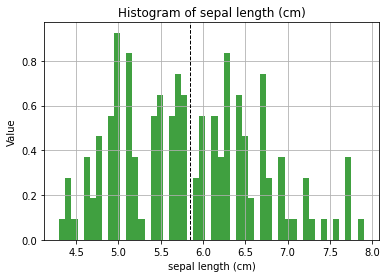

In [20]:
variable="sepal length (cm)"
n, bins, patches = plt.hist(
        X[variable], 50, density=True, facecolor="g", alpha=0.75
    )
plt.axvline(X[variable].mean(), color="k", linestyle="dashed", linewidth=1)
plt.xlabel(variable)
plt.ylabel("Value")
plt.title("Histogram of " + variable)
plt.grid(True)
plt.savefig("./images/" + variable + ".png")

In [43]:
data=pd.read_csv("candidate.csv")
a=[str(a) for a in data.iloc[0, :]]
",".join(a)

'2,3,4,5'

In [76]:
input_data=pd.read_csv("candidate.csv")
input_data = {
                "columns": ",".join([a for a in input_data.columns]),
                "values": ",".join([str(a) for a in input_data.iloc[0, :]]),
            }
response = requests.get(
                "http://localhost:8000/post_data",input_data
            )
response

<Response [500]>

In [64]:
values='2,3,4,5'
columns= 'asd,awd,asf,ase'
candidate = pd.DataFrame(
        np.array([float(a) for a in values.split(",")]), columns=columns.split(",")
    )

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

In [75]:
data=np.array([float(a) for a in values.split(",")])
data=data.reshape(1,data.shape[0])
data

array([[2., 3., 4., 5.]])